In [1]:
import random as r
import json

from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick


from AbstractArchitecture_v2 import AbstractArchitecture
from DenseEncoder import DenseEncoder
from DenseDecoder import DenseDecoder
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE
from plot_model_prediction import plot_model_prediction

In [2]:
# Set data file locations
data_file_prefix = './data/NLSL_expt1'

# Specify where model weights are saved
#mw_path = "./model_weights/NLSL_Experiment_03c_final_model_weights.tf"
#mw_path = './model_weights/NLSL_Experiment_04c_checkpoint.tf'
#mw_path = './model_weights/NLSL_Experiment_04c_best_aec_model_weights.tf'
#mw_path = "./model_weights/NLSL_Experiment_05a_checkpoint_full"
mpath = "./model_weights/NLSL_Experiment_05c/model_5"
l=128


model = tf.keras.models.load_model(mpath, custom_objects={'NormalizedMeanSquaredError':NMSE})


In [3]:
# Step 1. Load in the data
data_train_u = np.load("{}_train1_u.npy".format(data_file_prefix)).astype(np.float32)
data_train_f = np.load("{}_train1_f.npy".format(data_file_prefix)).astype(np.float32)
data_val_u = np.load("{}_val_u.npy".format(data_file_prefix)).astype(np.float32)
data_val_f = np.load("{}_val_f.npy".format(data_file_prefix)).astype(np.float32)
data_test_u1 = np.load("{}_test1_u.npy".format(data_file_prefix)).astype(np.float32)
data_test_f1 = np.load("{}_test1_f.npy".format(data_file_prefix)).astype(np.float32)
data_test_u = np.load("{}_test2_u.npy".format(data_file_prefix)).astype(np.float32)
data_test_f = np.load("{}_test2_f.npy".format(data_file_prefix)).astype(np.float32)



In [4]:
# Set up loss function to evaluate losses
lossfn = NMSE()

# Predict results for all validation data
u_pred, F_pred, Lv_pred, Linvf_pred = model.predict([data_val_u, data_val_f])

# Score the results
u_pred_score = lossfn(u_pred, data_val_u)
F_pred_score = lossfn(F_pred, data_val_f)
Lv_pred_score = lossfn(Lv_pred, data_val_f)
Linvf_pred_score = lossfn(Linvf_pred, data_val_u)

print(u_pred_score, F_pred_score, Lv_pred_score, Linvf_pred_score)

tf.Tensor(2.6363577e-06, shape=(), dtype=float32) tf.Tensor(0.00013568162, shape=(), dtype=float32) tf.Tensor(0.00016670352, shape=(), dtype=float32) tf.Tensor(2.0190559e-05, shape=(), dtype=float32)


In [5]:
# Create plots from a specified validation solution
i = 7

val_u = data_val_u[i,:]
val_F = data_val_f[i,:]

u_pp = u_pred[i,:]
F_pp = F_pred[i,:]
Lv_pp = Lv_pred[i,:]
Linvf_pp = Linvf_pred[i,:]

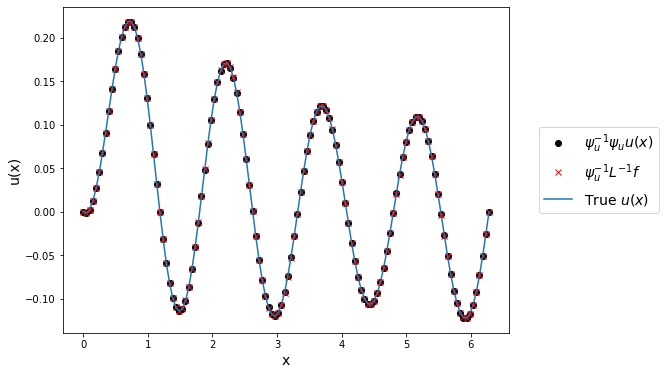

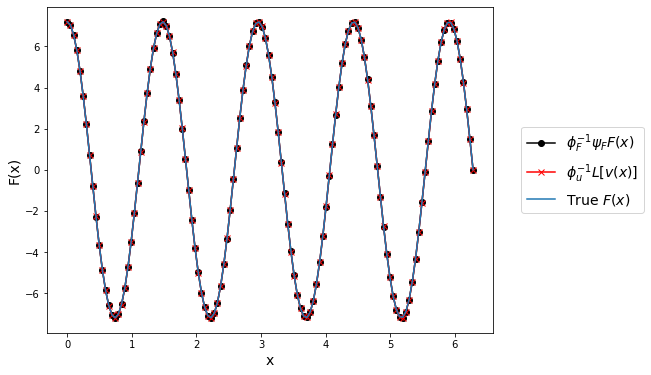

In [6]:
x = np.linspace(0,2*np.pi, 128)

opts = {'fontsize':14}

fs = (8,6)
plt.figure(figsize=fs)

plt.plot(x, u_pp, 'ko', label=r'$\psi^{-1}_u \psi_u u(x)$')
plt.plot(x, Linvf_pp, 'rx', label=r'$\psi^{-1}_u L^{-1}f$')
plt.plot(x, val_u, label=r'True $u(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("u(x)", **opts)
plt.xlabel("x", **opts)

plt.figure(figsize=fs)
plt.plot(x, F_pp, 'ko-', label=r'$\phi^{-1}_F \psi_F F(x)$')
plt.plot(x, Lv_pp, 'rx-', label=r'$\phi^{-1}_u L[v(x)]$')
plt.plot(x, val_F, label=r'True $F(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("F(x)", **opts)
plt.xlabel("x", **opts)

plt.show()

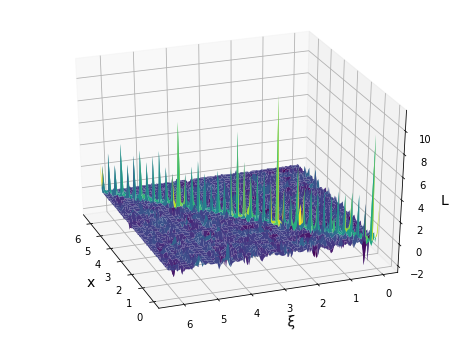

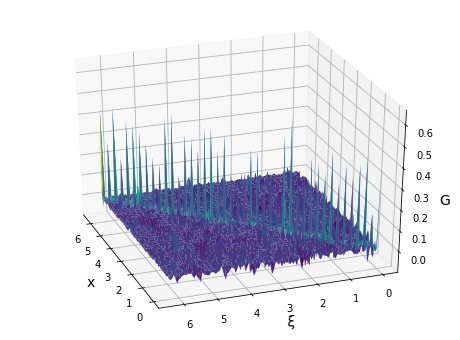

In [7]:
utm = tf.linalg.band_part(model.Operator, 0, -1, name="L_upper")
L = tf.multiply(0.5, utm+tf.transpose(utm), name="L")

G = np.linalg.inv(L)

X,XI = np.meshgrid(x,x)

fig = plt.figure(figsize=fs)
ax = plt.axes(projection='3d')
ax.plot_surface(X, XI, L, cmap='viridis')
ax.set_xlabel("x", **opts)
ax.set_ylabel(r'$\xi$', **opts)
ax.set_zlabel('L', **opts)
ax.view_init(30,160)

fig = plt.figure(figsize=fs)
ax = plt.axes(projection='3d')
ax.plot_surface(X, XI, G, cmap='viridis')
ax.set_xlabel("x", **opts)
ax.set_ylabel(r'$\xi$', **opts)
ax.set_zlabel('G', **opts)
ax.view_init(30,160)

plt.show()

tf.Tensor(2.0927691e-06, shape=(), dtype=float32) tf.Tensor(0.0066874013, shape=(), dtype=float32) tf.Tensor(0.0061248685, shape=(), dtype=float32) tf.Tensor(0.002431125, shape=(), dtype=float32)


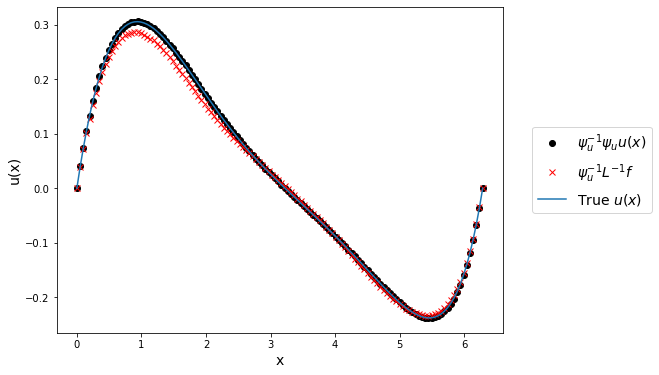

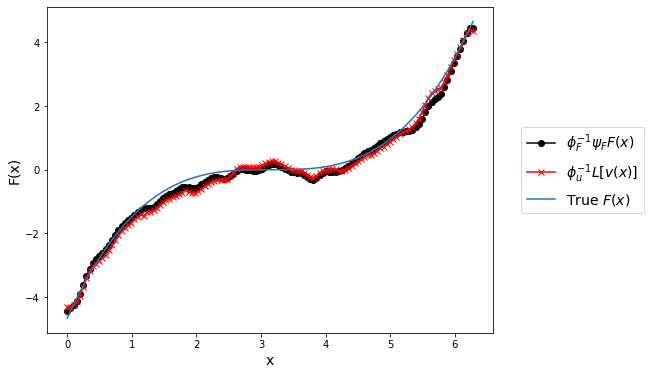

In [8]:
# Evaluating some test data

# Predict results for all validation data
u_pred, F_pred, Lv_pred, Linvf_pred = model.predict([data_test_u, data_test_f])

# Score the results
u_pred_score = lossfn(u_pred, data_test_u)
F_pred_score = lossfn(F_pred, data_test_f)
Lv_pred_score = lossfn(Lv_pred, data_test_f)
Linvf_pred_score = lossfn(Linvf_pred, data_test_u)

print(u_pred_score, F_pred_score, Lv_pred_score, Linvf_pred_score)


# Create plots from a specified validation solution
i = 7

val_u = data_test_u[i,:]
val_F = data_test_f[i,:]
u_pp = u_pred[i,:]
F_pp = F_pred[i,:]
Lv_pp = Lv_pred[i,:]
Linvf_pp = Linvf_pred[i,:]


# Plot the results!
opts = {'fontsize':14}

fs = (8,6)
plt.figure(figsize=fs)

plt.plot(x, u_pp, 'ko', label=r'$\psi^{-1}_u \psi_u u(x)$')
plt.plot(x, Linvf_pp, 'rx', label=r'$\psi^{-1}_u L^{-1}f$')
plt.plot(x, val_u, label=r'True $u(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("u(x)", **opts)
plt.xlabel("x", **opts)

plt.figure(figsize=fs)
plt.plot(x, F_pp, 'ko-', label=r'$\phi^{-1}_F \psi_F F(x)$')
plt.plot(x, Lv_pp, 'rx-', label=r'$\phi^{-1}_u L[v(x)]$')
plt.plot(x, val_F, label=r'True $F(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("F(x)", **opts)
plt.xlabel("x", **opts)

plt.show()

tf.Tensor(2.41079e-06, shape=(), dtype=float32) tf.Tensor(0.00014398003, shape=(), dtype=float32) tf.Tensor(0.00017489627, shape=(), dtype=float32) tf.Tensor(2.1144855e-05, shape=(), dtype=float32)


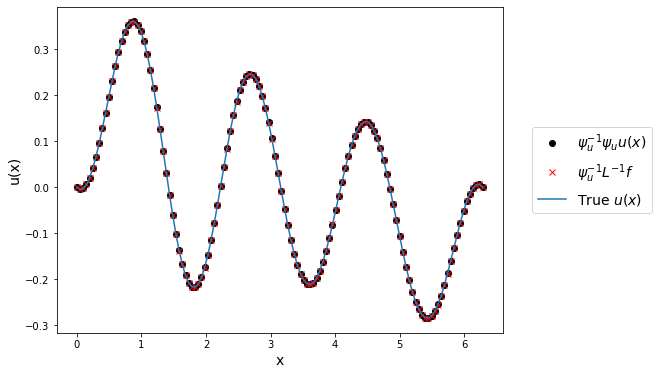

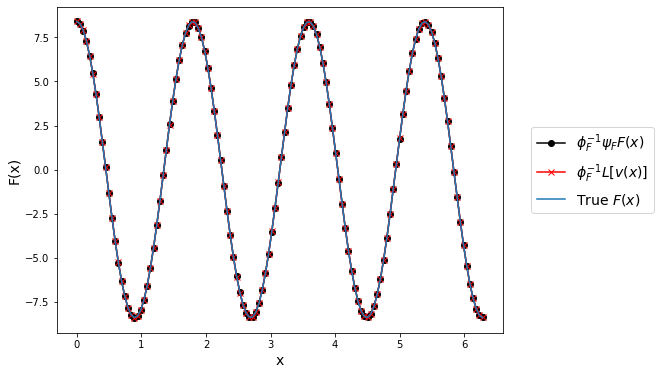

In [9]:
# Evaluating some test data

# Predict results for all validation data
u_pred, F_pred, Lv_pred, Linvf_pred = model.predict([data_test_u1, data_test_f1])

# Score the results
u_pred_score = lossfn(u_pred, data_test_u1)
F_pred_score = lossfn(F_pred, data_test_f1)
Lv_pred_score = lossfn(Lv_pred, data_test_f1)
Linvf_pred_score = lossfn(Linvf_pred, data_test_u1)

print(u_pred_score, F_pred_score, Lv_pred_score, Linvf_pred_score)


# Create plots from a specified validation solution
i = 7

val_u = data_test_u1[i,:]
val_F = data_test_f1[i,:]
u_pp = u_pred[i,:]
F_pp = F_pred[i,:]
Lv_pp = Lv_pred[i,:]
Linvf_pp = Linvf_pred[i,:]


# Plot the results!
opts = {'fontsize':14}

fs = (8,6)
plt.figure(figsize=fs)

plt.plot(x, u_pp, 'ko', label=r'$\psi^{-1}_u \psi_u u(x)$')
plt.plot(x, Linvf_pp, 'rx', label=r'$\psi^{-1}_u L^{-1}f$')
plt.plot(x, val_u, label=r'True $u(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("u(x)", **opts)
plt.xlabel("x", **opts)

plt.figure(figsize=fs)
plt.plot(x, F_pp, 'ko-', label=r'$\phi^{-1}_F \psi_F F(x)$')
plt.plot(x, Lv_pp, 'rx-', label=r'$\phi^{-1}_F L[v(x)]$')
plt.plot(x, val_F, label=r'True $F(x)$')
plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("F(x)", **opts)
plt.xlabel("x", **opts)

plt.show()

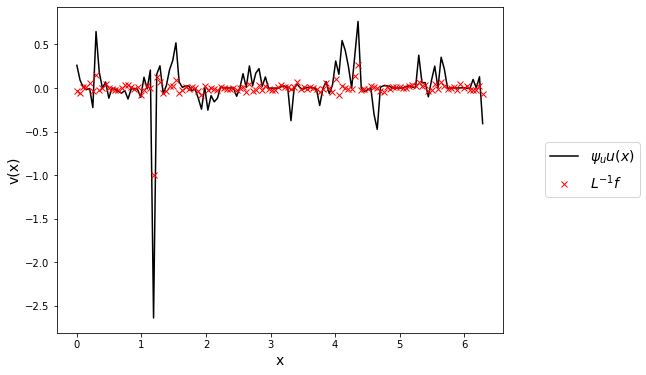

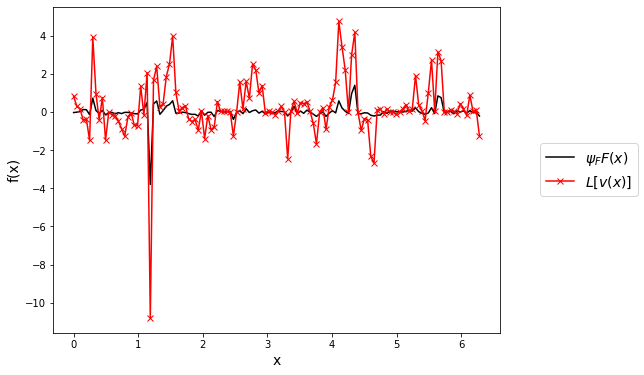

In [10]:
u_enc = model.layers[0]
F_enc = model.layers[2]

sample_u = data_train_u[i:i+1,:]
sample_F = data_train_f[i:i+1,:]

v = u_enc(sample_u)
v = tf.matmul(v, model.u_Reduce)

f = F_enc(sample_F)
f = tf.matmul(v, model.F_Reduce)

Lv = tf.matmul(v, L)
Linvf = tf.linalg.solve(L, tf.transpose(f), adjoint=True)
Linvf = tf.transpose(Linvf)
 
# Plot the results!
x20 = np.linspace(0, 2*np.pi, 128)
opts = {'fontsize':14}

fs = (8,6)
plt.figure(figsize=fs)

plt.plot(x20, v.numpy().flatten(), 'k', label=r'$\psi_u u(x)$')
plt.plot(x20, Linvf.numpy().flatten(), 'rx', label=r'$L^{-1}f$')

plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("v(x)", **opts)
plt.xlabel("x", **opts)

plt.figure(figsize=fs)
plt.plot(x20, f.numpy().flatten(), 'k-', label=r'$\psi_F F(x)$')
plt.plot(x20, Lv.numpy().flatten(), 'rx-', label=r'$L[v(x)]$')

plt.legend(bbox_to_anchor=(1.2,0.5), loc='center', **opts)
plt.ylabel("f(x)", **opts)
plt.xlabel("x", **opts)

plt.show()

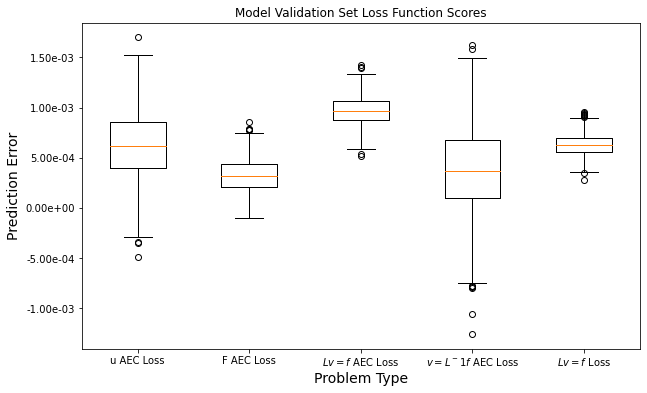

In [13]:
probs = ["u AEC Loss", "F AEC Loss", r"$Lv=f$ AEC Loss", r"$v=L^-1f$ AEC Loss", r"$Lv=f$ Loss"]

n = 1000
losses = 5
means = np.random.uniform(1e-4,1e-3,losses)
spreads = np.random.uniform(1e-4,5e-4,losses)

data = []
for i in range(len(probs)):
    data.append(np.random.normal(means[i], spreads[i], n))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title(r'Model Validation Set Loss Function Scores')
ax.set_ylabel("Prediction Error", fontsize=14)
ax.set_xlabel("Problem Type", fontsize=14)
ax.boxplot(data, labels=probs)
#ax.ticklabel_format(axis='y', style='sci')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.show()

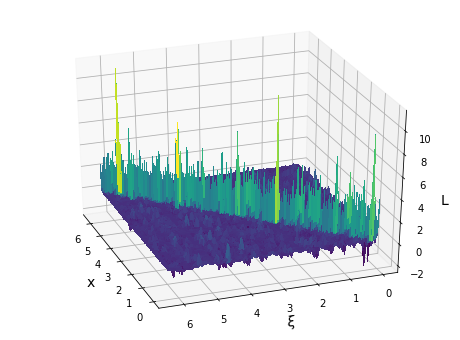

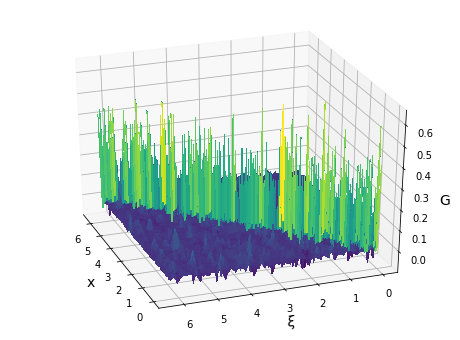

In [57]:
import matplotlib as mpl

#tri = mpl.tri.Triangulation(x, x)
fig = plt.figure(figsize=fs)
ax = plt.axes(projection='3d')
#ax.plot_trisurf(X=x, Y=x, Z=G)#, cmap='viridis')
ax.plot_surface(X, XI, L, rcount=128, ccount=128, antialiased=False, cmap='viridis')
ax.set_xlabel("x", **opts)
ax.set_ylabel(r'$\xi$', **opts)
ax.set_zlabel('L', **opts)
ax.view_init(30,160)

fig = plt.figure(figsize=fs)
ax = plt.axes(projection='3d')
#ax.plot_trisurf(X=x, Y=x, Z=G)#, cmap='viridis')
ax.plot_surface(X, XI, G, rcount=128, ccount=128, antialiased=False, cmap='viridis')
ax.set_xlabel("x", **opts)
ax.set_ylabel(r'$\xi$', **opts)
ax.set_zlabel('G', **opts)
ax.view_init(30,160)

plt.show()

Text(0, 0.5, '$\\xi$')

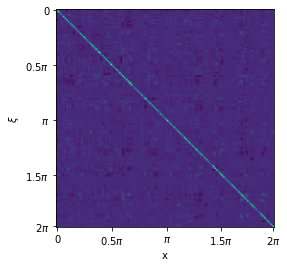

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(G)
tick_array = np.linspace(0,G.shape[0],G.shape[0])
ticks = list(tick_array[::int(G.shape[0]/4)])+[127]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticks()
labels = ["{:.1f}".format(xval) for xval in x[::20]]
labels = ["0", r"$0.5 \pi$", r"$\pi$", r"$1.5 \pi$", r"$2 \pi$"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("x")
ax.set_ylabel(r'$\xi$')